In [1]:
from sqlalchemy import create_engine
from config import db_password
import pandas as pd
import matplotlib.pyplot as plt
from path import Path
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
db_location = 'probowl.cq2v3ncckm8b.us-east-2.rds.amazonaws.com'

In [3]:
db_string = f"postgresql://postgres:{db_password}@{db_location}/postgres"

In [4]:
engine = create_engine(db_string)

In [5]:
QB_2019_df = pd.read_sql_table('qb_2019', engine)

In [6]:
QB_2019_df.head()

,player,tm,age,pos,g,gs,cmp,pass_att,pass_yds,pass_td,...,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
0,Jameis Winston,TAM,25,QB,16,16,380,626,5109,33,...,2,59,250,1,0,0,0,0,0,False
1,Dak Prescott,DAL,26,QB,16,16,388,596,4902,30,...,0,52,277,3,0,0,0,0,0,False
2,Jared Goff,LAR,25,QB,16,16,394,626,4638,22,...,2,33,40,2,0,0,0,0,0,False
3,Philip Rivers,LAC,38,QB,16,16,390,591,4615,23,...,2,12,29,0,0,0,0,0,0,False
4,Matt Ryan,ATL,34,QB,15,15,408,616,4466,26,...,2,34,147,1,0,0,0,0,0,False


In [7]:
QB_2019_df = QB_2019_df.drop(columns=["pos","tm"])

In [8]:
QB_2019_df.head()

,player,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
0,Jameis Winston,25,16,16,380,626,5109,33,30,2,2,59,250,1,0,0,0,0,0,False
1,Dak Prescott,26,16,16,388,596,4902,30,11,0,0,52,277,3,0,0,0,0,0,False
2,Jared Goff,25,16,16,394,626,4638,22,16,1,2,33,40,2,0,0,0,0,0,False
3,Philip Rivers,38,16,16,390,591,4615,23,20,1,2,12,29,0,0,0,0,0,0,False
4,Matt Ryan,34,15,15,408,616,4466,26,14,3,2,34,147,1,0,0,0,0,0,False


In [9]:
QB_2019_df = QB_2019_df.set_index("player")



In [10]:
QB_2019_df

,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
player,,,,,,,,,,,,,,,,,,,
Jameis Winston,25,16,16,380,626,5109,33,30,2,2,59,250,1,0,0,0,0,0,False
Dak Prescott,26,16,16,388,596,4902,30,11,0,0,52,277,3,0,0,0,0,0,False
Jared Goff,25,16,16,394,626,4638,22,16,1,2,33,40,2,0,0,0,0,0,False
Philip Rivers,38,16,16,390,591,4615,23,20,1,2,12,29,0,0,0,0,0,0,False
Matt Ryan,34,15,15,408,616,4466,26,14,3,2,34,147,1,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Garrett Gilbert,28,5,0,0,3,0,0,0,0,0,3,-3,0,0,0,0,0,0,False
Gardner Minshew,23,14,12,0,0,0,0,0,0,0,67,344,0,0,0,0,0,0,False
Robert Griffin,29,7,1,0,0,0,0,0,0,0,20,70,0,0,0,0,0,0,False


In [11]:
X_train = QB_2019_df.drop(columns="pro_bowl")

In [12]:
X_train

,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb
player,,,,,,,,,,,,,,,,,,
Jameis Winston,25,16,16,380,626,5109,33,30,2,2,59,250,1,0,0,0,0,0
Dak Prescott,26,16,16,388,596,4902,30,11,0,0,52,277,3,0,0,0,0,0
Jared Goff,25,16,16,394,626,4638,22,16,1,2,33,40,2,0,0,0,0,0
Philip Rivers,38,16,16,390,591,4615,23,20,1,2,12,29,0,0,0,0,0,0
Matt Ryan,34,15,15,408,616,4466,26,14,3,2,34,147,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Garrett Gilbert,28,5,0,0,3,0,0,0,0,0,3,-3,0,0,0,0,0,0
Gardner Minshew,23,14,12,0,0,0,0,0,0,0,67,344,0,0,0,0,0,0
Robert Griffin,29,7,1,0,0,0,0,0,0,0,20,70,0,0,0,0,0,0


In [13]:
y_train = QB_2019_df["pro_bowl"]
y_train

player
Jameis Winston     False
Dak Prescott       False
Jared Goff         False
Philip Rivers      False
Matt Ryan          False
                   ...  
Garrett Gilbert    False
Gardner Minshew    False
Robert Griffin     False
Trace McSorley     False
Nick Mullens       False
Name: pro_bowl, Length: 73, dtype: bool

In [14]:
QB_2020_df = pd.read_sql_table('qb_2020', engine)
QB_2020_df.head()

,player,tm,age,pos,g,gs,cmp,pass_att,pass_yds,pass_td,...,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
0,Deshaun Watson,HOU,25,QB,16,16,382.0,544.0,4823.0,33.0,...,0.0,90.0,444.0,3.0,0.0,0.0,0.0,0.0,0.0,True
1,Patrick Mahomes,KAN,25,QB,15,15,390.0,588.0,4740.0,38.0,...,3.0,62.0,308.0,2.0,0.0,0.0,0.0,0.0,0.0,True
2,Tom Brady,TAM,43,QB,16,16,401.0,610.0,4633.0,40.0,...,3.0,30.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,False
3,Matt Ryan,ATL,35,QB,16,16,407.0,626.0,4581.0,26.0,...,0.0,29.0,92.0,2.0,0.0,0.0,0.0,0.0,0.0,False
4,Josh Allen,BUF,24,QB,16,16,396.0,572.0,4544.0,37.0,...,3.0,102.0,421.0,8.0,1.0,1.0,12.0,1.0,9.0,True


In [15]:
QB_2020_df = QB_2020_df.drop(columns=["pos","tm"])
QB_2020_df.head()

,player,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
0,Deshaun Watson,25,16,16,382.0,544.0,4823.0,33.0,7.0,0.0,0.0,90.0,444.0,3.0,0.0,0.0,0.0,0.0,0.0,True
1,Patrick Mahomes,25,15,15,390.0,588.0,4740.0,38.0,6.0,3.0,3.0,62.0,308.0,2.0,0.0,0.0,0.0,0.0,0.0,True
2,Tom Brady,43,16,16,401.0,610.0,4633.0,40.0,12.0,3.0,3.0,30.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,False
3,Matt Ryan,35,16,16,407.0,626.0,4581.0,26.0,11.0,0.0,0.0,29.0,92.0,2.0,0.0,0.0,0.0,0.0,0.0,False
4,Josh Allen,24,16,16,396.0,572.0,4544.0,37.0,10.0,2.0,3.0,102.0,421.0,8.0,1.0,1.0,12.0,1.0,9.0,True


In [16]:
QB_2020_df = QB_2020_df.set_index("player")
QB_2020_df.head()

,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
player,,,,,,,,,,,,,,,,,,,
Deshaun Watson,25,16,16,382.0,544.0,4823.0,33.0,7.0,0.0,0.0,90.0,444.0,3.0,0.0,0.0,0.0,0.0,0.0,True
Patrick Mahomes,25,15,15,390.0,588.0,4740.0,38.0,6.0,3.0,3.0,62.0,308.0,2.0,0.0,0.0,0.0,0.0,0.0,True
Tom Brady,43,16,16,401.0,610.0,4633.0,40.0,12.0,3.0,3.0,30.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,False
Matt Ryan,35,16,16,407.0,626.0,4581.0,26.0,11.0,0.0,0.0,29.0,92.0,2.0,0.0,0.0,0.0,0.0,0.0,False
Josh Allen,24,16,16,396.0,572.0,4544.0,37.0,10.0,2.0,3.0,102.0,421.0,8.0,1.0,1.0,12.0,1.0,9.0,True


In [17]:
X_test = QB_2020_df.drop(columns="pro_bowl")
X_test.head()

,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb
player,,,,,,,,,,,,,,,,,,
Deshaun Watson,25,16,16,382.0,544.0,4823.0,33.0,7.0,0.0,0.0,90.0,444.0,3.0,0.0,0.0,0.0,0.0,0.0
Patrick Mahomes,25,15,15,390.0,588.0,4740.0,38.0,6.0,3.0,3.0,62.0,308.0,2.0,0.0,0.0,0.0,0.0,0.0
Tom Brady,43,16,16,401.0,610.0,4633.0,40.0,12.0,3.0,3.0,30.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0
Matt Ryan,35,16,16,407.0,626.0,4581.0,26.0,11.0,0.0,0.0,29.0,92.0,2.0,0.0,0.0,0.0,0.0,0.0
Josh Allen,24,16,16,396.0,572.0,4544.0,37.0,10.0,2.0,3.0,102.0,421.0,8.0,1.0,1.0,12.0,1.0,9.0


In [18]:
y_test = QB_2020_df["pro_bowl"]
y_test.head()

player
Deshaun Watson      True
Patrick Mahomes     True
Tom Brady          False
Matt Ryan          False
Josh Allen          True
Name: pro_bowl, dtype: bool

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(73, 18)
(80, 18)
(73,)
(80,)


In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [21]:
classifier.fit(X_train, y_train)

C:\Users\soren\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=200, random_state=1)

In [22]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,True,True
1,True,True
2,False,False
3,False,False
4,True,True
5,True,False
6,True,True
7,False,False
8,True,True
9,False,False


In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.925


In [24]:
# Create a random forest classifier.
rf_model_QB = RandomForestClassifier(n_estimators=128, random_state=78) 

In [25]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Fitting the model
rf_model_QB = rf_model_QB.fit(X_train_scaled, y_train)

In [27]:
# Making predictions using the testing data.
predictions = rf_model_QB.predict(X_test_scaled)
predictions

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [28]:
# Calculating the confusion matrix.
cm1 = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm1_df = pd.DataFrame(
    cm1, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm1_df

,Predicted 0,Predicted 1
Actual 0,72,2
Actual 1,6,0


In [29]:
# Calculating the accuracy score.
acc_score1 = accuracy_score(y_test, predictions)
acc_score1

0.9

In [31]:
# Displaying results
print("Confusion Matrix")
display(cm1_df)
print(f"Accuracy Score : {acc_score1}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,72,2
Actual 1,6,0


Accuracy Score : 0.9
Classification Report
              precision    recall  f1-score   support

       False       0.92      0.97      0.95        74
        True       0.00      0.00      0.00         6

    accuracy                           0.90        80
   macro avg       0.46      0.49      0.47        80
weighted avg       0.85      0.90      0.88        80



In [32]:
# Calculate feature importance in the Random Forest model.
importances_QB = rf_model_QB.feature_importances_
importances_QB

array([0.02936471, 0.03800872, 0.04150588, 0.08568762, 0.07206673,
       0.06901932, 0.21938826, 0.13043225, 0.02145   , 0.03888244,
       0.09426017, 0.08104219, 0.0447599 , 0.00814163, 0.00302109,
       0.00515504, 0.00258617, 0.0152279 ])

In [33]:
# We can sort the features by their importance.
sorted(zip(rf_model_QB.feature_importances_, X_test.columns), reverse=True)


Category,pass_td,int,rush_att,cmp,rush_yds,pass_att,pass_yds,rush_td,gs,gwd,g,age,fqc,fmb,tgt,rec_yds,rec,rec_td
Weighted Importance,0.219388,0.130432,0.09426,0.085688,0.081042,0.072067,0.069019,0.04476,0.041506,0.038882,0.038009,0.029365,0.02145,0.015228,0.008142,0.005155,0.003021,0.002586


In [34]:
import time
import numpy as np

start_time = time.time()
importances = rf_model_QB.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_QB.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.011 seconds


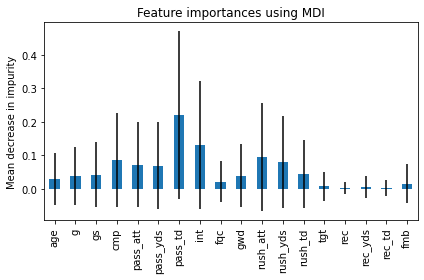

In [35]:
forest_importances_QB = pd.Series(importances_QB, index= X_test.columns)

fig, ax = plt.subplots()

forest_importances_QB.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [36]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(rf_model_QB, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

Elapsed time to compute the importances: 2.221 seconds


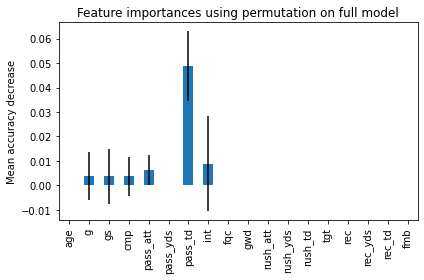

In [37]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()